# 1 - Explorando os Dados


Nesta seção lemos a base que se encontra no Drive (**mutacoes.csv**). Esta base possui dados de mutações que foram extraídos do banco de dados TCGA - The Cancer Genoma Atlas (https://cancergenome.nih.gov/), do banco de dados COSMIC - Catalogue Of Somatic Mutations In Cancer (https://cancer.sanger.ac.uk/cosmic) e do banco de dados dbSNP - Short Genetic Variations (https://www.ncbi.nlm.nih.gov/projects/SNP/). Esta base de dados só possui mutações do tipo **MISSENSE** e que ocorrem na região **Exon** e **CDS**.

Após conversas com os especialistas,  foram definidos quais campos desta base deveriam ser utilizados no processamento de aprendizagem que irá identificar quais mutações são deletérias e quais não são. Abaixo, uma breve descrição dos campos escolhidos:

- **chr** - Cromossomo onde ocorreu a mutação
- **pos** - Posição no cromossomo onde ocorreu a mutação
- **dbSNP_CAF** - Lista da frequência alélica do alelo de referência e do alelo alternativo (campo do banco de dados dbSNP)
- **Variant_class1** - Tipo de alteração que a mutação vai causar (NON_SYNONYMOUS_CODING, START_LOST, STOP_LOST, NON_SYNONYMOUS_START, nomenclatura utilizada pelo programa SnpEff)
- **changeProt** - Tipo de alteração sofrida pela proteína
- **changecDNA** - Tipo de alteração sofrida pelo DNA codificante
- **esp_MAF** - Lista da menor frequência alélica em porcentagem na poppulação EA (Europeu Americano), AA(Americano Africano), All (Todas as populações)
- **esp_TAC** - Lista da contagem total de alelos alternativos e alelos de referência
- **Ndamage** - Quantidade de preditores  que possuem anotação para esta mutanção classificando-a como deletéria "/ " quantidade total de preditores analisados.
- **EFFect** - Efeito causado pela mutação baseado no campo **Variant_class1**




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

base = pd.read_csv("drive/My Drive/ML/ProjetoTese/mutacoes.csv", sep=';')



In [0]:
#aumentado a capacidade de visualização de colunas e linhas
import pandas as pd

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',7000)

In [11]:
base.columns

Index(['chr', 'pos', 'sample', 'stype', 'tissue', 'gene', 'Gene_Region',
       'refseq', 'exon_refseq', 'ref', 'var', 'dbSNP_ID', 'dbSNP_CAF',
       'dbSNP_COMMON', 'dbSNPBuild', 'Type_SNV_or_INDEL', 'Variant_class1',
       'Variant_class2', 'changeProt', 'changecDNA', 'codon', 'aa', 'esp_MAF',
       'esp_TAC', 'cosmic', 'cosmicAA', 'cosmicCDS', 'hapMapAC', 'hapMapAF',
       'hapMapAN', 'Clinical', 'Ancestral_allele', 'Interpro_domain',
       'Uniprot_id', 'SIFT_pred', 'SIFT_score', 'Polyphen2_HDIV_pred',
       'Polyphen2_HDIV_score', 'Polyphen2_HVAR_pred', 'Polyphen2_HVAR_score',
       'LR_pred', 'LR_score', 'MutationAssessor_pred',
       'MutationAssessor_score', 'LRT_pred', 'LRT_score', 'FATHMM_pred',
       'FATHMM_score', 'RadialSVM_pred', 'RadialSVM_score',
       'MutationTaster_pred', 'MutationTaster_score', 'Ndamage', 'EFFect',
       'het', 'source'],
      dtype='object')

In [12]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2562013 entries, 0 to 2562012
Data columns (total 56 columns):
chr                       object
pos                       int64
sample                    object
stype                     object
tissue                    object
gene                      object
Gene_Region               object
refseq                    object
exon_refseq               int64
ref                       object
var                       object
dbSNP_ID                  object
dbSNP_CAF                 object
dbSNP_COMMON              object
dbSNPBuild                object
Type_SNV_or_INDEL         object
Variant_class1            object
Variant_class2            object
changeProt                object
changecDNA                object
codon                     object
aa                        object
esp_MAF                   object
esp_TAC                   object
cosmic                    object
cosmicAA                  object
cosmicCDS                 objec

In [14]:
#Identificando registros duplicados nos dados brutos
dupes=base.duplicated()
sum(dupes)

0

Selecionando os campos que serão analisados

In [0]:
base_clean = base.loc[:,['chr','pos', 'ref','var','dbSNP_CAF','Variant_class1', 'changeProt','changecDNA','esp_MAF','esp_TAC','Ndamage', 'EFFect']]

In [16]:
base_clean.tail()

,chr,pos,ref,var,dbSNP_CAF,Variant_class1,changeProt,changecDNA,esp_MAF,esp_TAC,Ndamage,EFFect
2562008,chr12,19514634,C,G,-,NON_SYNONYMOUS_CODING,p.Thr1201Arg,c.3602C>G,-,-,0/9,MODERATE
2562009,chr18,57103289,C,T,-,NON_SYNONYMOUS_CODING,p.Gly358Arg,c.1072G>A,-,-,3/9,MODERATE
2562010,chr2,67631578,A,C,-,NON_SYNONYMOUS_CODING,p.Glu588Asp,c.1764A>C,-,-,2/9,MODERATE
2562011,chr3,38307499,T,C,-,NON_SYNONYMOUS_CODING,p.Cys50Arg,c.148T>C,-,-,7/9,MODERATE
2562012,chr1,114380398,G,A,-,NON_SYNONYMOUS_CODING,p.Pro542Ser,c.1624C>T,-,-,3/9,MODERATE


In [18]:
base_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2562013 entries, 0 to 2562012
Data columns (total 12 columns):
chr               object
pos               int64
ref               object
var               object
dbSNP_CAF         object
Variant_class1    object
changeProt        object
changecDNA        object
esp_MAF           object
esp_TAC           object
Ndamage           object
EFFect            object
dtypes: int64(1), object(11)
memory usage: 234.6+ MB


##1.1 Eliminando os registros duplicados

Primeiro, vamos identificar se há registros (instâncias) duplicados na nossa base.

In [19]:
#Identify duplicates records in the data
dupes=base_clean.duplicated()
sum(dupes)

686023

In [0]:
base_sem_duplicada = base_clean.drop_duplicates(['chr','pos', 'ref','var','dbSNP_CAF','Variant_class1', 'changeProt','changecDNA','esp_MAF','esp_TAC','Ndamage', 'EFFect'],keep='first')

In [21]:
base_sem_duplicada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1875990 entries, 0 to 2562012
Data columns (total 12 columns):
chr               object
pos               int64
ref               object
var               object
dbSNP_CAF         object
Variant_class1    object
changeProt        object
changecDNA        object
esp_MAF           object
esp_TAC           object
Ndamage           object
EFFect            object
dtypes: int64(1), object(11)
memory usage: 186.1+ MB


In [22]:
base_sem_duplicada.head()

,chr,pos,ref,var,dbSNP_CAF,Variant_class1,changeProt,changecDNA,esp_MAF,esp_TAC,Ndamage,EFFect
0,chr12,102591424,A,C,-,NON_SYNONYMOUS_CODING,p.Phe42Cys,c.125T>G,-,-,2/8,MODERATE
1,chr19,22364342,T,C,-,NON_SYNONYMOUS_CODING,p.Ile59Met,c.177A>G,-,-,0/8,MODERATE
2,chr14,95923627,G,C,-,NON_SYNONYMOUS_CODING,p.Gln226Glu,c.676C>G,-,-,0/9,MODERATE
3,chr19,1090131,T,C,-,NON_SYNONYMOUS_CODING,p.His148Arg,c.443A>G,-,-,8/9,MODERATE
4,chr7,71275429,G,A,-,NON_SYNONYMOUS_CODING,p.His184Tyr,c.550C>T,-,-,3/9,MODERATE


##1.2  Usando *value_counts* para identificar os valores dos campos    

In [23]:
def categories_column(df):
    for col in ['chr', 'ref', 'var', 'dbSNP_CAF','Variant_class1', 'changeProt','changecDNA','esp_MAF','esp_TAC','Ndamage', 'EFFect']:
        mydic= df[col].value_counts().to_dict()
        print(col, mydic)
        print('\n')

categories_column(base_sem_duplicada)


Output hidden; open in https://colab.research.google.com to view.

In [0]:
#identificando as classes de valores do campo
base_sem_duplicada['pos'].value_counts()

140890710    24
140890625    24
140389311    18
140890616    12
140890560    12
140890603    12
140874429    12
140890574    12
140885042    12
140890566    12
140874422    12
140890573    12
140890684    12
140389244     9
140362134     9
140389325     9
140362125     9
140389267     9
140389511     9
140389400     9
140389278     9
140389367     9
140389459     9
140389313     9
140358577     9
140358556     9
140389408     9
140389352     9
140389271     9
140362079     9
             ..
42294758      1
4543975       1
96651549      1
29857215      1
197631422     1
72147133      1
38235552      1
113651080     1
38151561      1
113653131     1
12977549      1
75898254      1
12981647      1
197574859     1
29356575      1
159833494     1
130452892     1
204259430     1
71808443      1
113724836     1
176637349     1
470440        1
164050347     1
34018735      1
117960112     1
92792241      1
91690649      1
59221433      1
197639610     1
33566726      1
Name: pos, Length: 17963

In [0]:
#identificando as classes de valores do campo
base_sem_duplicada['changeProt'].value_counts()

p.Met1?              2600
p.Ala2Val             247
p.Ala2Thr             241
p.Glu111Lys           168
p.Glu109Lys           156
p.Glu144Lys           154
p.Glu38Lys            154
p.Glu71Lys            153
p.Glu64Lys            149
p.Glu75Lys            149
p.Glu54Lys            149
p.Glu102Lys           149
p.Glu122Lys           148
p.Glu89Lys            148
p.Glu119Lys           147
p.Glu114Lys           147
p.Glu116Lys           147
p.Glu133Lys           145
p.Glu76Lys            144
p.Glu98Lys            144
p.Glu169Lys           143
p.Glu104Lys           143
p.Glu37Lys            143
p.Glu192Lys           142
p.Glu157Lys           142
p.Glu151Lys           141
p.Glu209Lys           141
p.Glu2Lys             141
p.Glu294Lys           141
p.Glu187Lys           141
                     ... 
p.Arg3226Trp            1
p.Arg1618Ser            1
p.Gly2375Val            1
p.Ter1104Serext*?       1
p.Ser3320Phe            1
p.Met1540Arg            1
p.Thr1838Arg            1
p.Ile3043Val

Ao analisar o retorno da função **value_counts** aplicada a cada campo selecionado da base, chegamos a seguinte conclusão:

- O campo **Variant_class1** não fará parte da nossa análise pois a maioria das instâncias (1.871.384 instâncias de um total de 1.875.990) possuem o valor **NON_SYNONYMOUS_CODING**

-  O campo **EFFect** não fará parte da nossa análise pois a maioria das instâncias (1.871.384 instâncias de um total de 1.875.990)  possuem o valor **MODERATE**



##1.3 Apagando as colunas Variant_class1 e EFFect

In [0]:
base_sem_duplicada = base_sem_duplicada.drop("Variant_class1",axis=1)
base_sem_duplicada = base_sem_duplicada.drop("EFFect",axis=1)

In [25]:
base_sem_duplicada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1875990 entries, 0 to 2562012
Data columns (total 10 columns):
chr           object
pos           int64
ref           object
var           object
dbSNP_CAF     object
changeProt    object
changecDNA    object
esp_MAF       object
esp_TAC       object
Ndamage       object
dtypes: int64(1), object(9)
memory usage: 157.4+ MB


##1.4 Limpando as colunas com relação a dados inexistentes

In [0]:
import numpy as np
def clean_column(df):
    for col in ['chr','ref','var','dbSNP_CAF','changeProt','changecDNA','esp_MAF','esp_TAC','Ndamage']:
        val_bool = df[col] == "-"
        my_dict = val_bool.value_counts().to_dict()
        if len(my_dict) == 2:
          df[col].replace('-', np.nan,inplace=True)
          df.dropna(inplace=True)
    
    return df

base_sem_duplicada = clean_column(base_sem_duplicada)



Retirando todas as entradas (registros) que possuiam valores nulos (**-**) em seus campos, a a base sofreu uma diminuição drástica! Tínhamos **1875990** registros e após a limpeza, restaram **34054** entradas.

In [27]:
base_sem_duplicada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34054 entries, 35 to 2561755
Data columns (total 10 columns):
chr           34054 non-null object
pos           34054 non-null int64
ref           34054 non-null object
var           34054 non-null object
dbSNP_CAF     34054 non-null object
changeProt    34054 non-null object
changecDNA    34054 non-null object
esp_MAF       34054 non-null object
esp_TAC       34054 non-null object
Ndamage       34054 non-null object
dtypes: int64(1), object(9)
memory usage: 2.9+ MB


O campo **pos** foi analisado em separado porque é o único campo que possui um  tipo de dados diferente diferente (**int64**)

In [0]:
base_sem_duplicada['pos'].value_counts()

140389500    9
31239101     3
29911119     3
108788596    2
23520243     2
52303291     2
46449891     2
150240895    2
248366601    2
40696233     2
70505072     2
100589135    2
74957853     2
45258402     2
248112560    2
11183451     2
31382999     2
29910558     2
124377338    2
6026708      2
126080830    2
220404347    2
9868870      2
103528002    2
179403769    2
140994031    2
36747919     2
17396415     2
45218339     2
184009901    2
            ..
67402362     1
31617627     1
17087074     1
167096931    1
39971432     1
169412872    1
74709610     1
41931375     1
88681437     1
100868721    1
179321458    1
145622772    1
219677301    1
60910124     1
234582651    1
111664163    1
49236604     1
35734141     1
29141632     1
71344769     1
44153474     1
48607875     1
40646786     1
22473352     1
14994060     1
58317454     1
10955408     1
33174163     1
47841941     1
56031093     1
Name: pos, Length: 33794, dtype: int64

Vamos verificar se existem entradas com valores nulos (**0** ou **negativo**) para o atributo **pos**

In [28]:
val_bool = base_sem_duplicada["pos"] <= 0
val_bool.value_counts(dropna=True)

False    34054
Name: pos, dtype: int64

In [29]:
base_sem_duplicada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34054 entries, 35 to 2561755
Data columns (total 10 columns):
chr           34054 non-null object
pos           34054 non-null int64
ref           34054 non-null object
var           34054 non-null object
dbSNP_CAF     34054 non-null object
changeProt    34054 non-null object
changecDNA    34054 non-null object
esp_MAF       34054 non-null object
esp_TAC       34054 non-null object
Ndamage       34054 non-null object
dtypes: int64(1), object(9)
memory usage: 2.9+ MB


In [30]:
base_sem_duplicada.head()

,chr,pos,ref,var,dbSNP_CAF,changeProt,changecDNA,esp_MAF,esp_TAC,Ndamage
35,chr12,104122684,G,A,"[0.9977,0.002296]",p.Ala1665Thr,c.4993G>A,"0.0233,0.6355,0.2307","30,12976",3/9
39,chr5,175956761,C,T,"[0.9995,0.0004591]",p.Val329Met,c.985G>A,"0.0814,0.1135,0.0923","12,12994",5/9
50,chr9,5073770,G,T,"[1,.,0]",p.Val617Phe,c.1849G>T,"0.0233,0.0227,0.0231","3,13003",8/9
78,chr7,30831088,G,A,"[0.8673,0.1327]",p.Arg324Lys,c.971G>A,"8.2223,17.4345,11.2548","1410,11118",1/9
177,chr14,23511939,C,T,"[0.9991,0.0009183]",p.Arg169Cys,c.505C>T,"0.1075,0.097,0.1041","13,12479",1/9


Transformando o data_frame **base_sem_duplicada** que não possui mais nenhum campo com valor faltante em um arquivo (**base_sem_missing.csv**)

In [0]:
base_sem_duplicada.to_csv("base_sem_missing_RP.csv",sep='\t',index=False)

##1.5 Tornando os campos multivalorados em campos atômicos

A base de dados possui muitos atributos(campos) multivalorados (**dbSNP_CAF, esp_MAF, esp_TAC, changeProt, changecDNA, Ndamage**). É necesário transformar esses campos em vários campos atômicos (campos que possuem valores únicos)

In [0]:
import pandas as pd

base_trab = pd.read_csv("base_sem_missing_RP.csv", sep='\t')

In [33]:
base_trab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34054 entries, 0 to 34053
Data columns (total 10 columns):
chr           34054 non-null object
pos           34054 non-null int64
ref           34054 non-null object
var           34054 non-null object
dbSNP_CAF     34054 non-null object
changeProt    34054 non-null object
changecDNA    34054 non-null object
esp_MAF       34054 non-null object
esp_TAC       34054 non-null object
Ndamage       34054 non-null object
dtypes: int64(1), object(9)
memory usage: 2.6+ MB


###1.5.1 Processando o campo dbSNP_CAF

O campo **dbSNP_CAF** é uma lista, contendo o alelo de referência e o alelo alternativo. Este campo será desmembrado em dois novos campos: **RefAllele, AltAllele**

In [0]:
l1=[]
l2=[]
def process_dbSNP_CAF(df):
    ref=[]
    alt=[]
    for i in df.dbSNP_CAF:
      #i é um string padrão: [1,.,0]   [0.208,0.792]  [0.9688,0.03122,.] [0.7948,.,.,.,0.2052],[0.7948,.,.,.,0.2052]
      #temos que retirar os "." existentes
      words=[]
      words = (i.replace("[","").replace("]","").split(","))
      #print("antes:", words)
      #retirando todos os "." da lista
      if len(words) > 2:
        words = list(filter(lambda elem: elem != ".", words))
        #retirando os elementos duplicados padrão: [0.7948,0.2052,0.7948,0.2052]
        if len(words) > 2:
          del words[2:4]
      ref.append(words[0])
      alt.append(words[1])
    return ref, alt
  
l1,l2 = process_dbSNP_CAF(base_trab)
base_trab['RefAllele'] = l1
base_trab['AltAllele'] = l2
base_trab['RefAllele'] = pd.to_numeric(base_trab.RefAllele, errors='coerce')
base_trab['AltAllele'] = pd.to_numeric(base_trab.AltAllele, errors='coerce')

In [37]:
#verificando se tem campos NaN que pode ter sido gerado na hora da conversão de object para numérico
import numpy as np
val_bool = base_trab["dbSNP_CAF"].isnull()   #testar para os campos: dbSNP_CAF, RefAllele, AltAllele
valores = base_trab[val_bool]
print(valores[["dbSNP_CAF","RefAllele","AltAllele" ]])

Empty DataFrame
Columns: [dbSNP_CAF, RefAllele, AltAllele]
Index: []


###1.5.2 Processando o campo esp_MAF

O campo **esp_MAF** é uma lista, contendo a porcentagem de frequência alélica na ordem de EA (Europeu Americano), AA(Americano Africano) e All(Todas as populações). Este campo será desmembrado em três novos campos: **MAF_EA, MAF_AA, MAF_All**

In [0]:
l1=[]
l2=[]
l3=[]
def process_esp_MAF(df):
    EA=[]
    AA=[]
    All=[]
    for i in df.esp_MAF:
      #i é um string padrão: 0.0233,0.6355,0.2307	
      words=[]
      words = (i.split(","))
      #tem um registro que foje do padrão: ['37.3023', '17.2946', '30.5244', '37.3023', '17.2946', '30.5244'], apagar duplicidade
      if len(words) > 3:
        del words[3:6]
      EA.append(words[0])
      AA.append(words[1])
      All.append(words[2])
    return EA,AA,All
  
l1,l2,l3 = process_esp_MAF(base_trab)
      
base_trab['MAF_EA'] = l1
base_trab['MAF_AA'] = l2
base_trab['MAF_All'] = l3

base_trab['MAF_EA'] = pd.to_numeric(base_trab.MAF_EA, errors='coerce')
base_trab['MAF_AA'] = pd.to_numeric(base_trab.MAF_AA, errors='coerce')
base_trab['MAF_All'] = pd.to_numeric(base_trab.MAF_All, errors='coerce')


In [42]:
#verificando se tem campos NaN que pode ter sido gerado na hora da conversão de object para numérico
import numpy as np
val_bool = base_trab["MAF_All"].isnull() #testar para os campos: esp_MAF, MAF_EA, MAF_AA, MAF_All
valores = base_trab[val_bool]
print(valores[["esp_MAF","MAF_EA","MAF_AA", "MAF_All" ]])

Empty DataFrame
Columns: [esp_MAF, MAF_EA, MAF_AA, MAF_All]
Index: []


###1.5.3 Processando o campo esp_TAC

O campo **esp_TAC** é uma lista, contendo a contagem total de alelos alternativos e de alelos de referências. Este campo será desmembrado em dois novos campos: **TAC_AltAllele, TAC_RefAllele**

In [0]:
l1=[]
l2=[]
def process_esp_TAC(df):
    alt=[]
    ref=[]
    for i in df.esp_TAC:
      #i é um string padrão: 1410,11118	
      words=[]
      words = (i.split(","))
      #tem registros que fojem do padrão: ['3970', '9036', '3970', '9036'] ['7333', '301', '0'] apagar duplicidade ou "0"
      if len(words) > 2:         
        words = words[0:2]
      alt.append(words[0])
      ref.append(words[1])
    return alt,ref
  
l1,l2 = process_esp_TAC(base_trab)
      
base_trab['TAC_AltAllele'] = l1
base_trab['TAC_RefAllele'] = l2

base_trab['TAC_AltAllele'] = pd.to_numeric(base_trab.TAC_AltAllele, errors='coerce')
base_trab['TAC_RefAllele'] = pd.to_numeric(base_trab.TAC_RefAllele, errors='coerce')

In [46]:
#verificando se tem campos NaN que pode ter sido gerado na hora da conversão de object para numérico
import numpy as np
val_bool = base_trab["TAC_RefAllele"].isnull() #testar para os campos: esp_TAC, TAC_AltAllele, TAC_RefAllele
valores = base_trab[val_bool]
print(valores[["esp_TAC","TAC_AltAllele","TAC_RefAllele"]])

Empty DataFrame
Columns: [esp_TAC, TAC_AltAllele, TAC_RefAllele]
Index: []


###1.5.4 Processando o campo changeProt

O campo **changeProt** contém a nomeclatura (https://varnomen.hgvs.org/)  que representa a alteração ocorrida em uma proteina.

Formato:  **“prefix”“amino_acid”“position”“new_amino_acid”**

Exemplo: p.Arg54Ser

Este campo será desmembrado em três novos campos: **aminBefore, aminAfter, poschangeProt**

In [0]:
import numpy as np
l1=[]
l2=[]
l3=[]
def process_changeProt(df):
    ant=[]
    pos=[]
    dep=[]
 
    for i in df.changeProt:
      # i é um string padrão: p.Val617Phe 
      # Temos 8 ocorrências no formato (C-terminal): 
      # “prefix”“Ter_position”“new_amino_acid”“ext”“position_new_termination_site”, e.g. p.Ter110Glnext*17
      # O padrão do tipo p.Ter327Argext*?, significa: 
      # uma variante no stop codon (Ter/*) na posição 327,
      # modificando o stop codon para um codon Arg e adicionando uma cauda de novos aminoacidos de comprimento desconhecido
      # desde que o quadro deslocado não contém um novo códon de parada.
      # 
      # Temos 25 ocorrências do padrão p.Met1? 
      # Representando codon de iniciação à tradução. 
      # A consequência de uma variante no nível da proteína não é conhecida (não pode ser prevista)
      words=[]
      if "Ter" in i:  
            words = i.replace("p.","")
            a = words[0:3]
            ant.append(a)
            d = words[-8:]
            dep.append(d)
            p = (words.split(a)[1]).split(d)[0]
            pos.append(p)
      elif "Met1?" in i:
            words = i.replace("p.","")
            a = words[0:3]
            ant.append(a)
            d = words[-1]
            dep.append(d)
            p = "1"
            pos.append(p)
      else:
            words = i.replace("p.","")
            a = words[0:3]
            ant.append(a)
            d = words[-3:]
            dep.append(d)
            p = (words.split(a)[1]).split(d)[0]
            pos.append(p)
    return ant, dep, pos
  
l1,l2,l3 = process_changeProt(base_trab)
base_trab['aminBefore'] = l1
base_trab['aminAfter'] = l2
base_trab['poschangeProt'] = l3

base_trab['poschangeProt'] = pd.to_numeric(base_trab.poschangeProt, errors='coerce')

In [50]:
#verificando se tem campos NaN que pode ter sido gerado na hora da conversão de object para numérico
import numpy as np
val_bool = base_trab["poschangeProt"].isnull() #testar para os campos: aminBefore, aminAfter, poschangeProt
valores = base_trab[val_bool]
print(valores[["aminBefore", "aminAfter", "poschangeProt"]])

Empty DataFrame
Columns: [aminBefore, aminAfter, poschangeProt]
Index: []


In [51]:
base_trab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34054 entries, 0 to 34053
Data columns (total 20 columns):
chr              34054 non-null object
pos              34054 non-null int64
ref              34054 non-null object
var              34054 non-null object
dbSNP_CAF        34054 non-null object
changeProt       34054 non-null object
changecDNA       34054 non-null object
esp_MAF          34054 non-null object
esp_TAC          34054 non-null object
Ndamage          34054 non-null object
RefAllele        34054 non-null float64
AltAllele        34054 non-null float64
MAF_EA           34054 non-null float64
MAF_AA           34054 non-null float64
MAF_All          34054 non-null float64
TAC_AltAllele    34054 non-null int64
TAC_RefAllele    34054 non-null int64
aminBefore       34054 non-null object
aminAfter        34054 non-null object
poschangeProt    34054 non-null int64
dtypes: float64(5), int64(4), object(11)
memory usage: 5.2+ MB


###1.5.5 Processando o campo changecDNA

O campo **changecDNA** contém a nomeclatura  que representa a alteração ocorrida em um DNA.

Formato: **“prefix”“position_substituted”“reference_nucleotide””>”new_nucleotide”**

Exemplo: c.123A>G

Este campo será desmembrado em três novos campos: **codonBefore, codonAfter, poschangecDNA**

In [0]:
l1=[]
l2=[]
l3=[]
def process_changecDNA(df):
    pos=[]
    ant=[]
    dep=[]
 
    for i in df.changecDNA:
      #i é um string padrão: c.1201A>G
      words=[]
      if "c." in i:   
        words = i.replace("c.","")
        d = words.split(">")[1]
        dep.append(d)
        a = words.split(">")[0]
        ant.append(a[-1]) #pega o último caracter que é o nucleotídeo
        p = a[0:-1] #pega tudo que existe antes do nucleotídeo
        pos.append(p)
    return ant, dep, pos
  
l1,l2,l3 = process_changecDNA(base_trab)

base_trab['codonBefore'] = l1
base_trab['codonAfter'] = l2
base_trab['poschangecDNA'] = l3

base_trab['poschangecDNA'] = pd.to_numeric(base_trab.poschangecDNA, errors='coerce')

In [54]:
#verificando se tem campos NaN que pode ter sido gerado na hora da conversão de object para numérico
import numpy as np
val_bool = base_trab["poschangecDNA"].isnull() #testar para os campos: changecDNA, poschangecDNA
valores = base_trab[val_bool]
print(valores[["changecDNA","poschangecDNA"]])

Empty DataFrame
Columns: [changecDNA, poschangecDNA]
Index: []


###1.5.6 Processando o campo Ndamage

O campo **Ndamage** é um string contendo a quantidade de preditores que esta mutação teve anotação, representado, através do seguinte padrão: 

**quantidade de preditores que apresentam notação para esta mutação "/" total de preditores utilizados**

Exemplo: 8/9

Este campo será desmembrado em dois novos campos: **Ndamage_qtde, Ndamage_tot**

In [67]:
base_trab.Ndamage.value_counts()

0/9    10147
1/9     5358
2/9     3564
0/8     2631
3/9     2409
4/9     2180
5/9     1621
1/8     1272
2/8      713
6/9      668
7/9      665
8/9      548
3/8      461
4/8      343
0/7      300
0/0      195
1/7      190
9/9      141
5/8      110
0/6       99
2/7       84
7/8       74
6/8       73
1/6       40
8/8       36
3/7       30
0/5       28
4/7       16
2/6       11
1/5       10
0/4        7
3/6        6
0/1        5
5/7        5
1/4        4
0/3        2
6/7        2
7/7        1
3/5        1
2/4        1
2/5        1
4/6        1
5/6        1
Name: Ndamage, dtype: int64

As instâncias com valores **0/0**   para o campo **Ndamage** serão removidas, pois não podemos avaliar a mutação se não temos esta informação.

In [0]:
base_trab = base_trab[base_trab.Ndamage != '0/0']

In [70]:
base_trab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33859 entries, 0 to 34053
Data columns (total 25 columns):
chr              33859 non-null object
pos              33859 non-null int64
ref              33859 non-null object
var              33859 non-null object
dbSNP_CAF        33859 non-null object
changeProt       33859 non-null object
changecDNA       33859 non-null object
esp_MAF          33859 non-null object
esp_TAC          33859 non-null object
Ndamage          33859 non-null object
RefAllele        33859 non-null float64
AltAllele        33859 non-null float64
MAF_EA           33859 non-null float64
MAF_AA           33859 non-null float64
MAF_All          33859 non-null float64
TAC_AltAllele    33859 non-null int64
TAC_RefAllele    33859 non-null int64
aminBefore       33859 non-null object
aminAfter        33859 non-null object
poschangeProt    33859 non-null int64
codonBefore      33859 non-null object
codonAfter       33859 non-null object
poschangecDNA    33859 non-null 

In [0]:
l1=[]
l2=[]

def process_Ndamage(df):
  qtde_pred =[]
  tot_pred=[]
  for i in df.Ndamage:
    #i é um string padrão: 8/9
    if len(i) == 3:
      q = i[0:1]
      qtde_pred.append(q)
      t = i[2:3]
      tot_pred.append(t)
  return qtde_pred, tot_pred
  
l1,l2 = process_Ndamage(base_trab)

base_trab['Ndamage_qtde'] = l1
base_trab['Ndamage_tot'] = l2
base_trab['Ndamage_qtde'] = pd.to_numeric(base_trab.Ndamage_qtde, errors='coerce')
base_trab['Ndamage_tot'] = pd.to_numeric(base_trab.Ndamage_tot, errors='coerce')

In [57]:
#verificando se tem campos NaN que pode ter sido gerado na hora da conversão de object para numérico
import numpy as np
val_bool = base_trab["Ndamage_tot"].isnull() #testar para os campos: Ndamage, Ndamage_tot
valores = base_trab[val_bool]
print(valores[["Ndamage","Ndamage_tot"]])

Empty DataFrame
Columns: [Ndamage, Ndamage_tot]
Index: []


In [72]:
base_trab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33859 entries, 0 to 34053
Data columns (total 25 columns):
chr              33859 non-null object
pos              33859 non-null int64
ref              33859 non-null object
var              33859 non-null object
dbSNP_CAF        33859 non-null object
changeProt       33859 non-null object
changecDNA       33859 non-null object
esp_MAF          33859 non-null object
esp_TAC          33859 non-null object
Ndamage          33859 non-null object
RefAllele        33859 non-null float64
AltAllele        33859 non-null float64
MAF_EA           33859 non-null float64
MAF_AA           33859 non-null float64
MAF_All          33859 non-null float64
TAC_AltAllele    33859 non-null int64
TAC_RefAllele    33859 non-null int64
aminBefore       33859 non-null object
aminAfter        33859 non-null object
poschangeProt    33859 non-null int64
codonBefore      33859 non-null object
codonAfter       33859 non-null object
poschangecDNA    33859 non-null 

In [73]:
base_trab.head()

,chr,pos,ref,var,dbSNP_CAF,changeProt,changecDNA,esp_MAF,esp_TAC,Ndamage,RefAllele,AltAllele,MAF_EA,MAF_AA,MAF_All,TAC_AltAllele,TAC_RefAllele,aminBefore,aminAfter,poschangeProt,codonBefore,codonAfter,poschangecDNA,Ndamage_qtde,Ndamage_tot
0,chr12,104122684,G,A,"[0.9977,0.002296]",p.Ala1665Thr,c.4993G>A,"0.0233,0.6355,0.2307","30,12976",3/9,0.9977,0.002296,0.0233,0.6355,0.2307,30,12976,Ala,Thr,1665,G,A,4993,3,9
1,chr5,175956761,C,T,"[0.9995,0.0004591]",p.Val329Met,c.985G>A,"0.0814,0.1135,0.0923","12,12994",5/9,0.9995,0.000459,0.0814,0.1135,0.0923,12,12994,Val,Met,329,G,A,985,5,9
2,chr9,5073770,G,T,"[1,.,0]",p.Val617Phe,c.1849G>T,"0.0233,0.0227,0.0231","3,13003",8/9,1.0000,0.000000,0.0233,0.0227,0.0231,3,13003,Val,Phe,617,G,T,1849,8,9
3,chr7,30831088,G,A,"[0.8673,0.1327]",p.Arg324Lys,c.971G>A,"8.2223,17.4345,11.2548","1410,11118",1/9,0.8673,0.132700,8.2223,17.4345,11.2548,1410,11118,Arg,Lys,324,G,A,971,1,9
4,chr14,23511939,C,T,"[0.9991,0.0009183]",p.Arg169Cys,c.505C>T,"0.1075,0.097,0.1041","13,12479",1/9,0.9991,0.000918,0.1075,0.0970,0.1041,13,12479,Arg,Cys,169,C,T,505,1,9


Os campos multivalorados (**dbSNP_CAF, changeProt, changecDNA, esp_MAF, esp_TAC, Ndamage**) não precisam fazer parte mais da nossa base, já que desmembramos esses campos em outros campos atômicos.



In [0]:
base_trab_clean = base_trab.loc[:,["chr", "pos","ref","var", "RefAllele", "AltAllele", "MAF_EA", "MAF_AA", "MAF_All", "TAC_AltAllele", "TAC_RefAllele", "aminBefore", "aminAfter", "poschangeProt", "codonBefore", "codonAfter", "poschangecDNA", "Ndamage_qtde",	"Ndamage_tot"]]   


In [75]:
base_trab_clean.head()

,chr,pos,ref,var,RefAllele,AltAllele,MAF_EA,MAF_AA,MAF_All,TAC_AltAllele,TAC_RefAllele,aminBefore,aminAfter,poschangeProt,codonBefore,codonAfter,poschangecDNA,Ndamage_qtde,Ndamage_tot
0,chr12,104122684,G,A,0.9977,0.002296,0.0233,0.6355,0.2307,30,12976,Ala,Thr,1665,G,A,4993,3,9
1,chr5,175956761,C,T,0.9995,0.000459,0.0814,0.1135,0.0923,12,12994,Val,Met,329,G,A,985,5,9
2,chr9,5073770,G,T,1.0000,0.000000,0.0233,0.0227,0.0231,3,13003,Val,Phe,617,G,T,1849,8,9
3,chr7,30831088,G,A,0.8673,0.132700,8.2223,17.4345,11.2548,1410,11118,Arg,Lys,324,G,A,971,1,9
4,chr14,23511939,C,T,0.9991,0.000918,0.1075,0.0970,0.1041,13,12479,Arg,Cys,169,C,T,505,1,9


Transformando o data_frame **base_trab_clean** que não possui mais nenhum campo multivalorado em um arquivo (**base_sem_multivalorado.csv**)

In [0]:
base_trab_clean.to_csv("base_sem_multivalorado_RP.csv",sep='\t',index=False)

##1.5 Gerando o campo Target (Deleteria)

O campo Target será o campo **Deleteria** . 

Aplicaremos o seguinte algoritmo, embasados no conhecimento dos especialistas.

- **Deleteria**  = 0, **Ndamage_qtde** < 5, a mutação é considerada não-deletéria  
- **Deleteria**  = 1, **Ndamage_qtde** >= 5, a mutação é considerada deletéria 

In [0]:
import pandas as pd

base_mut = pd.read_csv("base_sem_multivalorado_RP.csv", sep='\t')

In [0]:
base_mut["Deleteria"] = (base_mut["Ndamage_qtde"]/base_mut["Ndamage_tot"]).apply(lambda x: 1  if x >= 0.50 else 0)



In [81]:
print(base_mut[["Ndamage_qtde","Deleteria"]])
base_mut["Deleteria"].value_counts()

       Ndamage_qtde  Deleteria
0                 3          0
1                 5          1
2                 8          1
3                 1          0
4                 1          0
5                 0          0
6                 0          0
7                 0          0
8                 1          0
9                 0          0
10                7          1
11                1          0
12                0          0
13                0          0
14                0          0
15                3          0
16                2          0
17                0          0
18                2          0
19                1          0
20                0          0
21                1          0
22                0          0
23                1          0
24                0          0
25                1          0
26                4          0
27                9          1
28                3          0
29                5          1
30                0          0
31      

0    29546
1     4313
Name: Deleteria, dtype: int64

In [82]:
base_mut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33859 entries, 0 to 33858
Data columns (total 20 columns):
chr              33859 non-null object
pos              33859 non-null int64
ref              33859 non-null object
var              33859 non-null object
RefAllele        33859 non-null float64
AltAllele        33859 non-null float64
MAF_EA           33859 non-null float64
MAF_AA           33859 non-null float64
MAF_All          33859 non-null float64
TAC_AltAllele    33859 non-null int64
TAC_RefAllele    33859 non-null int64
aminBefore       33859 non-null object
aminAfter        33859 non-null object
poschangeProt    33859 non-null int64
codonBefore      33859 non-null object
codonAfter       33859 non-null object
poschangecDNA    33859 non-null int64
Ndamage_qtde     33859 non-null int64
Ndamage_tot      33859 non-null int64
Deleteria        33859 non-null int64
dtypes: float64(5), int64(8), object(7)
memory usage: 5.2+ MB


##1.6 Aplicando  a função get_dummies() 

Os campos do tipo Object (**chr, ref, var, aminBefore, aminAfter, codonBefore, codonAfter**) do dataframe precisam ser binarizados para podermos aplicar os algoritmos de aprendizagem.

Os campos desmembrados  do campo **Ndamage** (**Ndamage_qtde,    Ndamage_tot**), não serão utilizados mais, pois o que nos interessa é o campo **Deleteria** que foi gerado a partir do campo **Ndamage_qtde**, como foi mostrado na seção acima.

In [0]:
base_final = base_mut.loc[:,["chr", "pos", "ref", "var","RefAllele", "AltAllele", "MAF_EA", "MAF_AA", "MAF_All", "TAC_AltAllele", "TAC_RefAllele", "aminBefore", "aminAfter", "poschangeProt", "codonBefore", "codonAfter", "poschangecDNA", "Deleteria"]]   


In [84]:
base_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33859 entries, 0 to 33858
Data columns (total 18 columns):
chr              33859 non-null object
pos              33859 non-null int64
ref              33859 non-null object
var              33859 non-null object
RefAllele        33859 non-null float64
AltAllele        33859 non-null float64
MAF_EA           33859 non-null float64
MAF_AA           33859 non-null float64
MAF_All          33859 non-null float64
TAC_AltAllele    33859 non-null int64
TAC_RefAllele    33859 non-null int64
aminBefore       33859 non-null object
aminAfter        33859 non-null object
poschangeProt    33859 non-null int64
codonBefore      33859 non-null object
codonAfter       33859 non-null object
poschangecDNA    33859 non-null int64
Deleteria        33859 non-null int64
dtypes: float64(5), int64(6), object(7)
memory usage: 4.6+ MB


In [0]:
def create_dummies(df,column_name):
    ##Create Dummy Columns (One Hot Encoding) from a single Column, com o parâmetro que dropa as colunas desnecessárias
    dummies = pd.get_dummies(df[column_name],prefix=column_name, drop_first=True)
    df = pd.concat([df,dummies],axis=1)
    return df

In [0]:
for col in ["chr","ref", "var","aminBefore","aminAfter","codonBefore","codonAfter"]:
       base_final  = create_dummies(base_final,col)

In [87]:
base_final.head()

,chr,pos,ref,var,RefAllele,AltAllele,MAF_EA,MAF_AA,MAF_All,TAC_AltAllele,TAC_RefAllele,aminBefore,aminAfter,poschangeProt,codonBefore,codonAfter,poschangecDNA,Deleteria,chr_chr10,chr_chr11,chr_chr12,chr_chr13,chr_chr14,chr_chr15,chr_chr16,chr_chr17,chr_chr18,chr_chr19,chr_chr2,chr_chr20,chr_chr21,chr_chr22,chr_chr3,chr_chr4,chr_chr5,chr_chr6,chr_chr7,chr_chr8,chr_chr9,chr_chrX,ref_C,ref_G,ref_T,var_C,var_G,var_T,aminBefore_Arg,aminBefore_Asn,aminBefore_Asp,aminBefore_Cys,aminBefore_Gln,aminBefore_Glu,aminBefore_Gly,aminBefore_His,aminBefore_Ile,aminBefore_Leu,aminBefore_Lys,aminBefore_Met,aminBefore_Phe,aminBefore_Pro,aminBefore_Ser,aminBefore_Ter,aminBefore_Thr,aminBefore_Trp,aminBefore_Tyr,aminBefore_Val,aminAfter_Ala,aminAfter_Arg,aminAfter_Argext*?,aminAfter_Asn,aminAfter_Asp,aminAfter_Cys,aminAfter_Gln,aminAfter_Glnext*?,aminAfter_Glu,aminAfter_Gly,aminAfter_Glyext*?,aminAfter_His,aminAfter_Ile,aminAfter_Leu,aminAfter_Lys,aminAfter_Met,aminAfter_Phe,aminAfter_Pro,aminAfter_Ser,aminAfter_Thr,aminAfter_Trp,aminAfter_Tyr,aminAfter_Tyrext*?,aminAfter_Val,codonBefore_C,codonBefore_G,codonBefore_T,codonAfter_C,codonAfter_G,codonAfter_T
0,chr12,104122684,G,A,0.9977,0.002296,0.0233,0.6355,0.2307,30,12976,Ala,Thr,1665,G,A,4993,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,chr5,175956761,C,T,0.9995,0.000459,0.0814,0.1135,0.0923,12,12994,Val,Met,329,G,A,985,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,chr9,5073770,G,T,1.0000,0.000000,0.0233,0.0227,0.0231,3,13003,Val,Phe,617,G,T,1849,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,chr7,30831088,G,A,0.8673,0.132700,8.2223,17.4345,11.2548,1410,11118,Arg,Lys,324,G,A,971,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,chr14,23511939,C,T,0.9991,0.000918,0.1075,0.0970,0.1041,13,12479,Arg,Cys,169,C,T,505,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


##1.7 Escalonando os campos que representam posições, os campos que representam contagem e os campos que representam frequência

In [88]:
base_final['pos'].describe(include='all').apply(lambda x: format(x, 'f'))

count        33859.000000
mean      76194933.445938
std       59544100.772005
min          45611.000000
25%       30336620.000000
50%       57799121.000000
75%      116053043.500000
max      249212393.000000
Name: pos, dtype: object

In [90]:
columns = ['poschangeProt', 'poschangecDNA', 'TAC_AltAllele', 'TAC_RefAllele', 'MAF_EA','MAF_AA','MAF_All']
base_final[columns].describe(include='all')

,poschangeProt,poschangecDNA,TAC_AltAllele,TAC_RefAllele,MAF_EA,MAF_AA,MAF_All
count,33859.000000,33859.000000,33859.000000,33859.000000,33859.000000,33859.000000,33859.000000
mean,623.274462,1868.390118,1256.291710,11321.712632,7.344034,7.023616,7.564230
std,1409.861536,4229.582987,2424.886242,2777.657356,12.888629,12.424406,12.883439
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.007700
25%,149.000000,445.000000,3.000000,10895.000000,0.011600,0.022700,0.023100
50%,324.000000,970.000000,39.000000,12749.000000,0.104700,0.295100,0.307600
75%,660.000000,1978.000000,1272.000000,12998.000000,9.037000,8.098300,9.763600
max,35261.000000,105782.000000,13004.000000,13005.000000,50.000000,50.000000,49.995300


Olhando para as nossas colunas numéricas que representam posições (**pos, poschangeProt, poschangecDNA**),  as que representam contagem (**TAC_AltAllele, TAC_RefAllele** ) e as que representam frequência (**MAF_EA, MAF_AA, MAF_All**)podemos ver uma grande diferença  na faixa de valores de cada uma delas. 

- **pos** têm valores entre 45611- 249212393
- **poschangeProt** têm valores entre 1 - 35261
- **poschangecDNA** têm valores entre 1 - 105782
- **TAC_AltAllele** têm valores entre 1 - 13004
- **TAC_RefAllele** têm valores entre 1 - 13005
- **MAF_EA** têm valores entre 0 - 50
- **MAF_AA** têm valores entre 0 - 50
- **MAF_All** têm valores entre 0.007 - 49.9953

A coluna **pos** está em uma escala dramaticamente diferente. Para garantir que esses valores sejam igualmente ponderados em nosso modelo, precisaremos redimensionar os dados.


In [0]:
from sklearn.preprocessing import minmax_scale

columns = ['pos','poschangeProt', 'poschangecDNA', 'TAC_AltAllele', 'TAC_RefAllele', 'MAF_EA','MAF_AA','MAF_All']

for col in columns:
    base_final[col + "_scaled"] = minmax_scale(base_final[col])
    

In [0]:
base_final.head()

,chr,pos,ref,var,RefAllele,AltAllele,MAF_EA,MAF_AA,MAF_All,TAC_AltAllele,TAC_RefAllele,aminBefore,aminAfter,poschangeProt,codonBefore,codonAfter,poschangecDNA,Deleteria,chr_chr10,chr_chr11,chr_chr12,chr_chr13,chr_chr14,chr_chr15,chr_chr16,chr_chr17,chr_chr18,chr_chr19,chr_chr2,chr_chr20,chr_chr21,chr_chr22,chr_chr3,chr_chr4,chr_chr5,chr_chr6,chr_chr7,chr_chr8,chr_chr9,chr_chrX,chr_chrY,ref_C,ref_G,ref_T,var_C,var_G,var_T,aminBefore_Arg,aminBefore_Asn,aminBefore_Asp,aminBefore_Cys,aminBefore_Gln,aminBefore_Glu,aminBefore_Gly,aminBefore_His,aminBefore_Ile,aminBefore_Leu,aminBefore_Lys,aminBefore_Met,aminBefore_Phe,aminBefore_Pro,aminBefore_Ser,aminBefore_Ter,aminBefore_Thr,aminBefore_Trp,aminBefore_Tyr,aminBefore_Val,aminAfter_Ala,aminAfter_Arg,aminAfter_Argext*?,aminAfter_Asn,aminAfter_Asp,aminAfter_Cys,aminAfter_Gln,aminAfter_Glnext*?,aminAfter_Glu,aminAfter_Gly,aminAfter_Glyext*?,aminAfter_His,aminAfter_Ile,aminAfter_Leu,aminAfter_Lys,aminAfter_Met,aminAfter_Phe,aminAfter_Pro,aminAfter_Ser,aminAfter_Thr,aminAfter_Trp,aminAfter_Tyr,aminAfter_Tyrext*?,aminAfter_Val,codonBefore_C,codonBefore_G,codonBefore_T,codonAfter_C,codonAfter_G,codonAfter_T,pos_scaled,poschangeProt_scaled,poschangecDNA_scaled,TAC_AltAllele_scaled,TAC_RefAllele_scaled,MAF_EA_scaled,MAF_AA_scaled,MAF_All_scaled
0,chr12,104122684,G,A,0.9977,0.002296,0.0233,0.6355,0.2307,30,12976,Ala,Thr,1665,G,A,4993,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.417700,0.047192,0.047192,0.002230,0.997770,0.000466,0.012710,0.004461
1,chr5,175956761,C,T,0.9995,0.000459,0.0814,0.1135,0.0923,12,12994,Val,Met,329,G,A,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.705998,0.009302,0.009302,0.000846,0.999154,0.001628,0.002270,0.001692
2,chr9,5073770,G,T,1.0000,0.000000,0.0233,0.0227,0.0231,3,13003,Val,Phe,617,G,T,1849,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.020180,0.017470,0.017470,0.000154,0.999846,0.000466,0.000454,0.000308
3,chr7,30831088,G,A,0.8673,0.132700,8.2223,17.4345,11.2548,1410,11118,Arg,Lys,324,G,A,971,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.123554,0.009161,0.009170,0.108360,0.854891,0.164446,0.348690,0.224998
4,chr14,23511939,C,T,0.9991,0.000918,0.1075,0.0970,0.1041,13,12479,Arg,Cys,169,C,T,505,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.094179,0.004765,0.004765,0.000923,0.959551,0.002150,0.001940,0.001928


As colunas originais dos valores que foram escalonados  (**pos, poschangeProt, poschangecDNA, TAC_AltAllele, TAC_RefAllele, MAF_EA, MAF_AA, MAF_All**) e as colunas originais dos valores que foram binarizados(**chr, ref, var, aminBefore, aminAfter, codonBefore, codonAfter**) não farão mais parte da nossa base de dados

In [0]:
base_final_clean = base_final.drop(["chr","ref", "var","aminBefore","aminAfter","codonBefore","codonAfter",'pos','poschangeProt', 'poschangecDNA', 'TAC_AltAllele', 'TAC_RefAllele', 'MAF_EA','MAF_AA','MAF_All'], axis=1)


In [93]:
base_final_clean.head()

,RefAllele,AltAllele,Deleteria,chr_chr10,chr_chr11,chr_chr12,chr_chr13,chr_chr14,chr_chr15,chr_chr16,chr_chr17,chr_chr18,chr_chr19,chr_chr2,chr_chr20,chr_chr21,chr_chr22,chr_chr3,chr_chr4,chr_chr5,chr_chr6,chr_chr7,chr_chr8,chr_chr9,chr_chrX,ref_C,ref_G,ref_T,var_C,var_G,var_T,aminBefore_Arg,aminBefore_Asn,aminBefore_Asp,aminBefore_Cys,aminBefore_Gln,aminBefore_Glu,aminBefore_Gly,aminBefore_His,aminBefore_Ile,aminBefore_Leu,aminBefore_Lys,aminBefore_Met,aminBefore_Phe,aminBefore_Pro,aminBefore_Ser,aminBefore_Ter,aminBefore_Thr,aminBefore_Trp,aminBefore_Tyr,aminBefore_Val,aminAfter_Ala,aminAfter_Arg,aminAfter_Argext*?,aminAfter_Asn,aminAfter_Asp,aminAfter_Cys,aminAfter_Gln,aminAfter_Glnext*?,aminAfter_Glu,aminAfter_Gly,aminAfter_Glyext*?,aminAfter_His,aminAfter_Ile,aminAfter_Leu,aminAfter_Lys,aminAfter_Met,aminAfter_Phe,aminAfter_Pro,aminAfter_Ser,aminAfter_Thr,aminAfter_Trp,aminAfter_Tyr,aminAfter_Tyrext*?,aminAfter_Val,codonBefore_C,codonBefore_G,codonBefore_T,codonAfter_C,codonAfter_G,codonAfter_T,pos_scaled,poschangeProt_scaled,poschangecDNA_scaled,TAC_AltAllele_scaled,TAC_RefAllele_scaled,MAF_EA_scaled,MAF_AA_scaled,MAF_All_scaled
0,0.9977,0.002296,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.417700,0.047192,0.047192,0.002230,0.997770,0.000466,0.012710,0.004461
1,0.9995,0.000459,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.705998,0.009302,0.009302,0.000846,0.999154,0.001628,0.002270,0.001692
2,1.0000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.020180,0.017470,0.017470,0.000154,0.999846,0.000466,0.000454,0.000308
3,0.8673,0.132700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.123554,0.009161,0.009170,0.108360,0.854891,0.164446,0.348690,0.224998
4,0.9991,0.000918,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.094179,0.004765,0.004765,0.000923,0.959551,0.002150,0.001940,0.001928


In [94]:
base_final_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33859 entries, 0 to 33858
Data columns (total 89 columns):
RefAllele               33859 non-null float64
AltAllele               33859 non-null float64
Deleteria               33859 non-null int64
chr_chr10               33859 non-null uint8
chr_chr11               33859 non-null uint8
chr_chr12               33859 non-null uint8
chr_chr13               33859 non-null uint8
chr_chr14               33859 non-null uint8
chr_chr15               33859 non-null uint8
chr_chr16               33859 non-null uint8
chr_chr17               33859 non-null uint8
chr_chr18               33859 non-null uint8
chr_chr19               33859 non-null uint8
chr_chr2                33859 non-null uint8
chr_chr20               33859 non-null uint8
chr_chr21               33859 non-null uint8
chr_chr22               33859 non-null uint8
chr_chr3                33859 non-null uint8
chr_chr4                33859 non-null uint8
chr_chr5                33859 no

Transformando o data_frame **base_final_clean** que não possui mais nenhum campo do tipo Object e nenhum campo numérico não escalonado em um arquivo (**base_final.csv**)




In [0]:
base_final_clean.to_csv("base_final_RP.csv",sep='\t',index=False)

#2 - Encontrando as Características Correlacionadas


Agora temos muitas colunas de características possíveis que podemos usar para treinar nosso modelo. Uma preocupação que devemos ter quando começamos  a adicionar mais características é um conceito chamado colinearidade. A colinearidade ocorre quando mais de uma característica contém dados semelhantes.

O efeito da colinearidade é que o seu modelo irá sofrer **overfit** - você pode obter ótimos resultados no seu conjunto de dados de treinamento, mas o modelo terá um desempenho pior em dados não vistos (como o conjunto de validação/teste).

 Uma maneira comum de detectar colinearidade é traçar correlações entre cada par de variáveis em um mapa de calor. 

In [0]:
import pandas as pd

base_ok = pd.read_csv("base_final_RP.csv", sep='\t')

In [185]:
base_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33859 entries, 0 to 33858
Data columns (total 89 columns):
RefAllele               33859 non-null float64
AltAllele               33859 non-null float64
Deleteria               33859 non-null int64
chr_chr10               33859 non-null int64
chr_chr11               33859 non-null int64
chr_chr12               33859 non-null int64
chr_chr13               33859 non-null int64
chr_chr14               33859 non-null int64
chr_chr15               33859 non-null int64
chr_chr16               33859 non-null int64
chr_chr17               33859 non-null int64
chr_chr18               33859 non-null int64
chr_chr19               33859 non-null int64
chr_chr2                33859 non-null int64
chr_chr20               33859 non-null int64
chr_chr21               33859 non-null int64
chr_chr22               33859 non-null int64
chr_chr3                33859 non-null int64
chr_chr4                33859 non-null int64
chr_chr5                33859 no

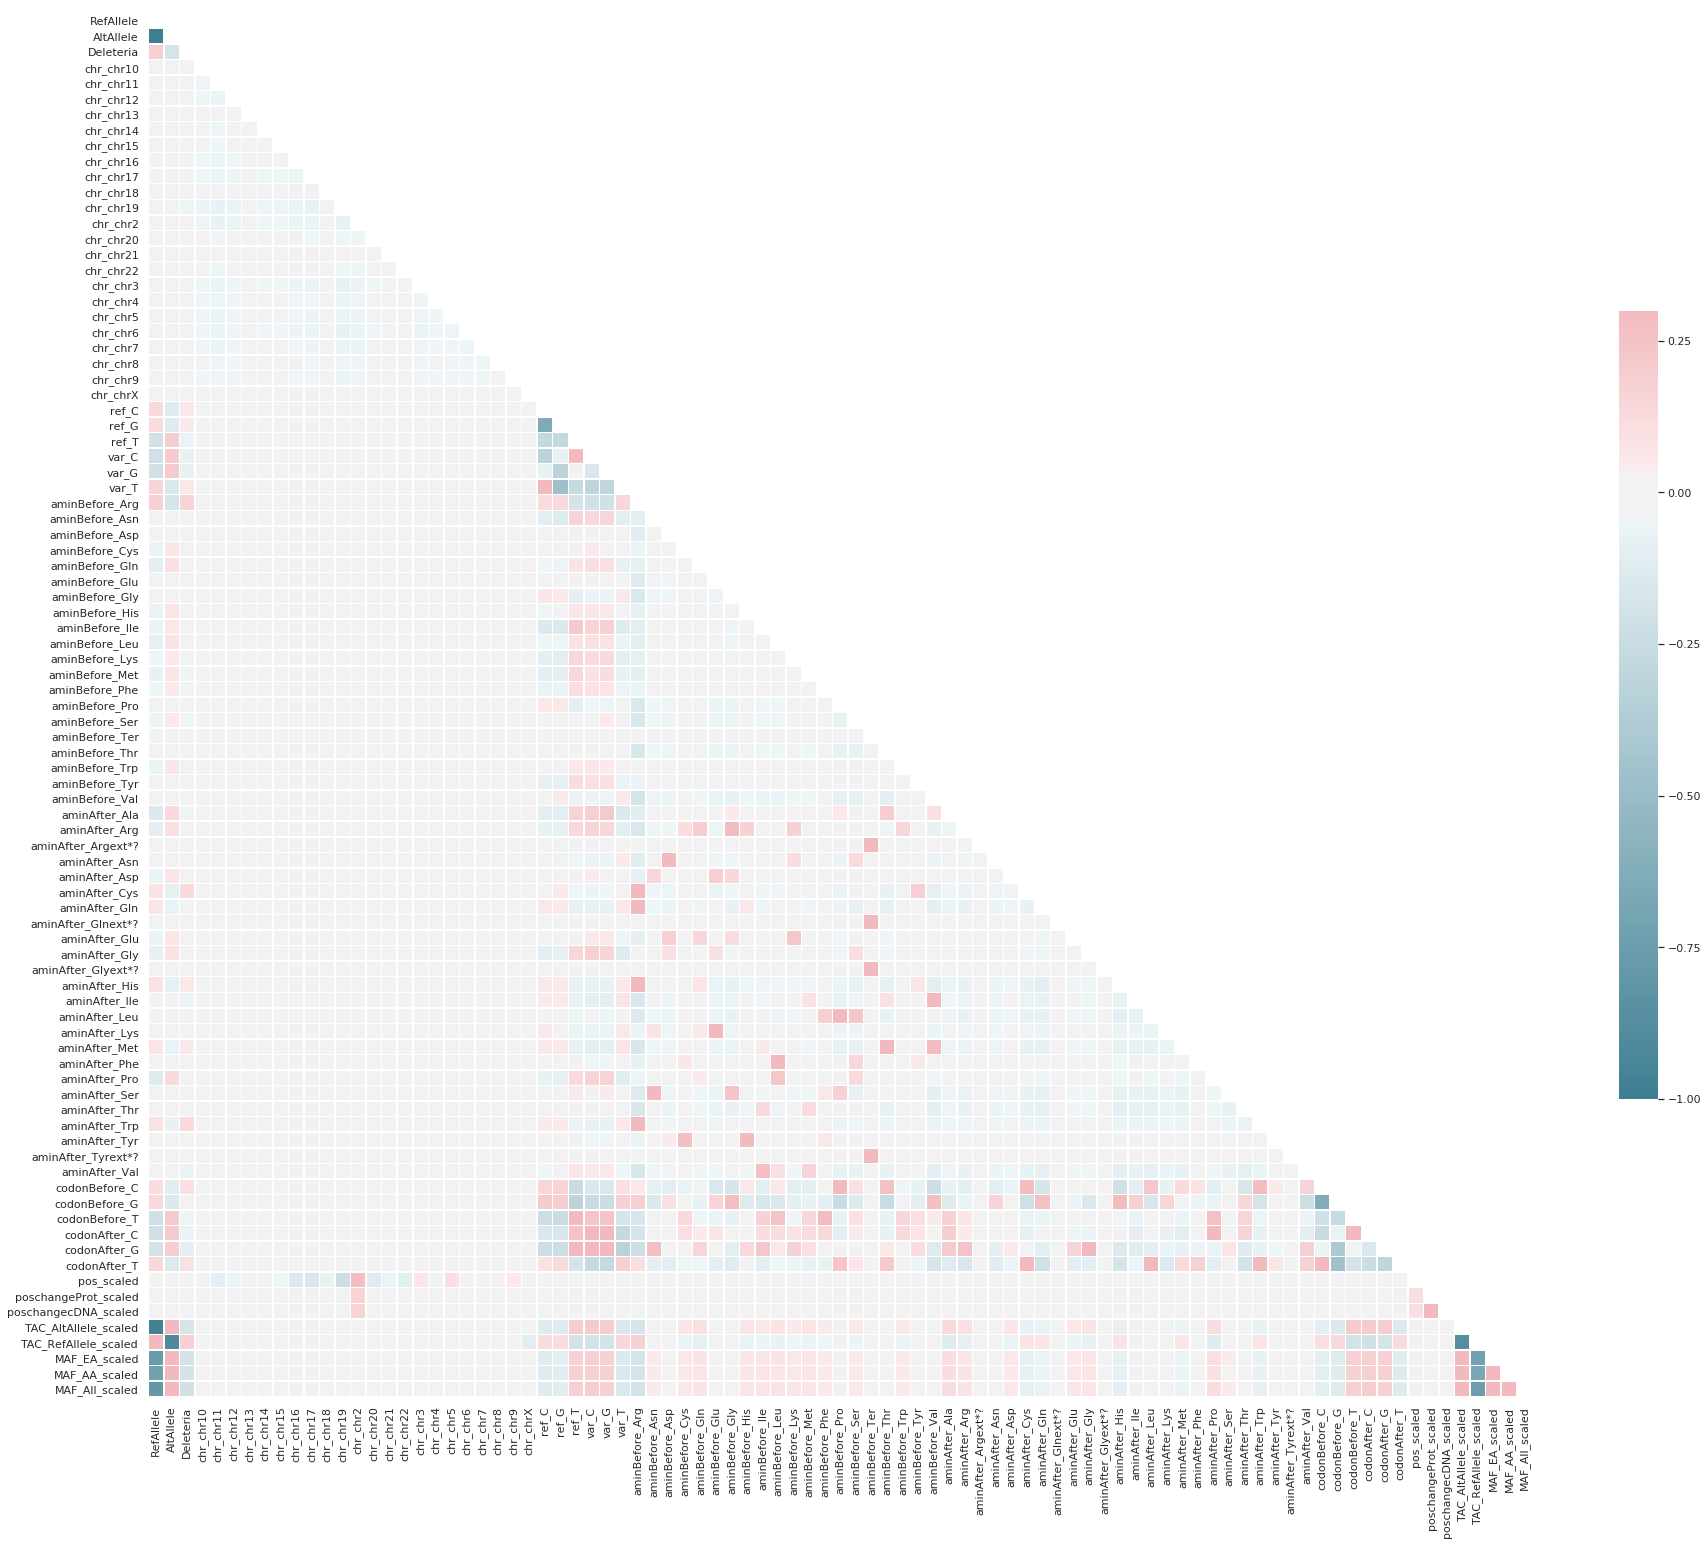

In [186]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(31, 29))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()


plot_correlation_heatmap(base_ok[base_ok.columns])


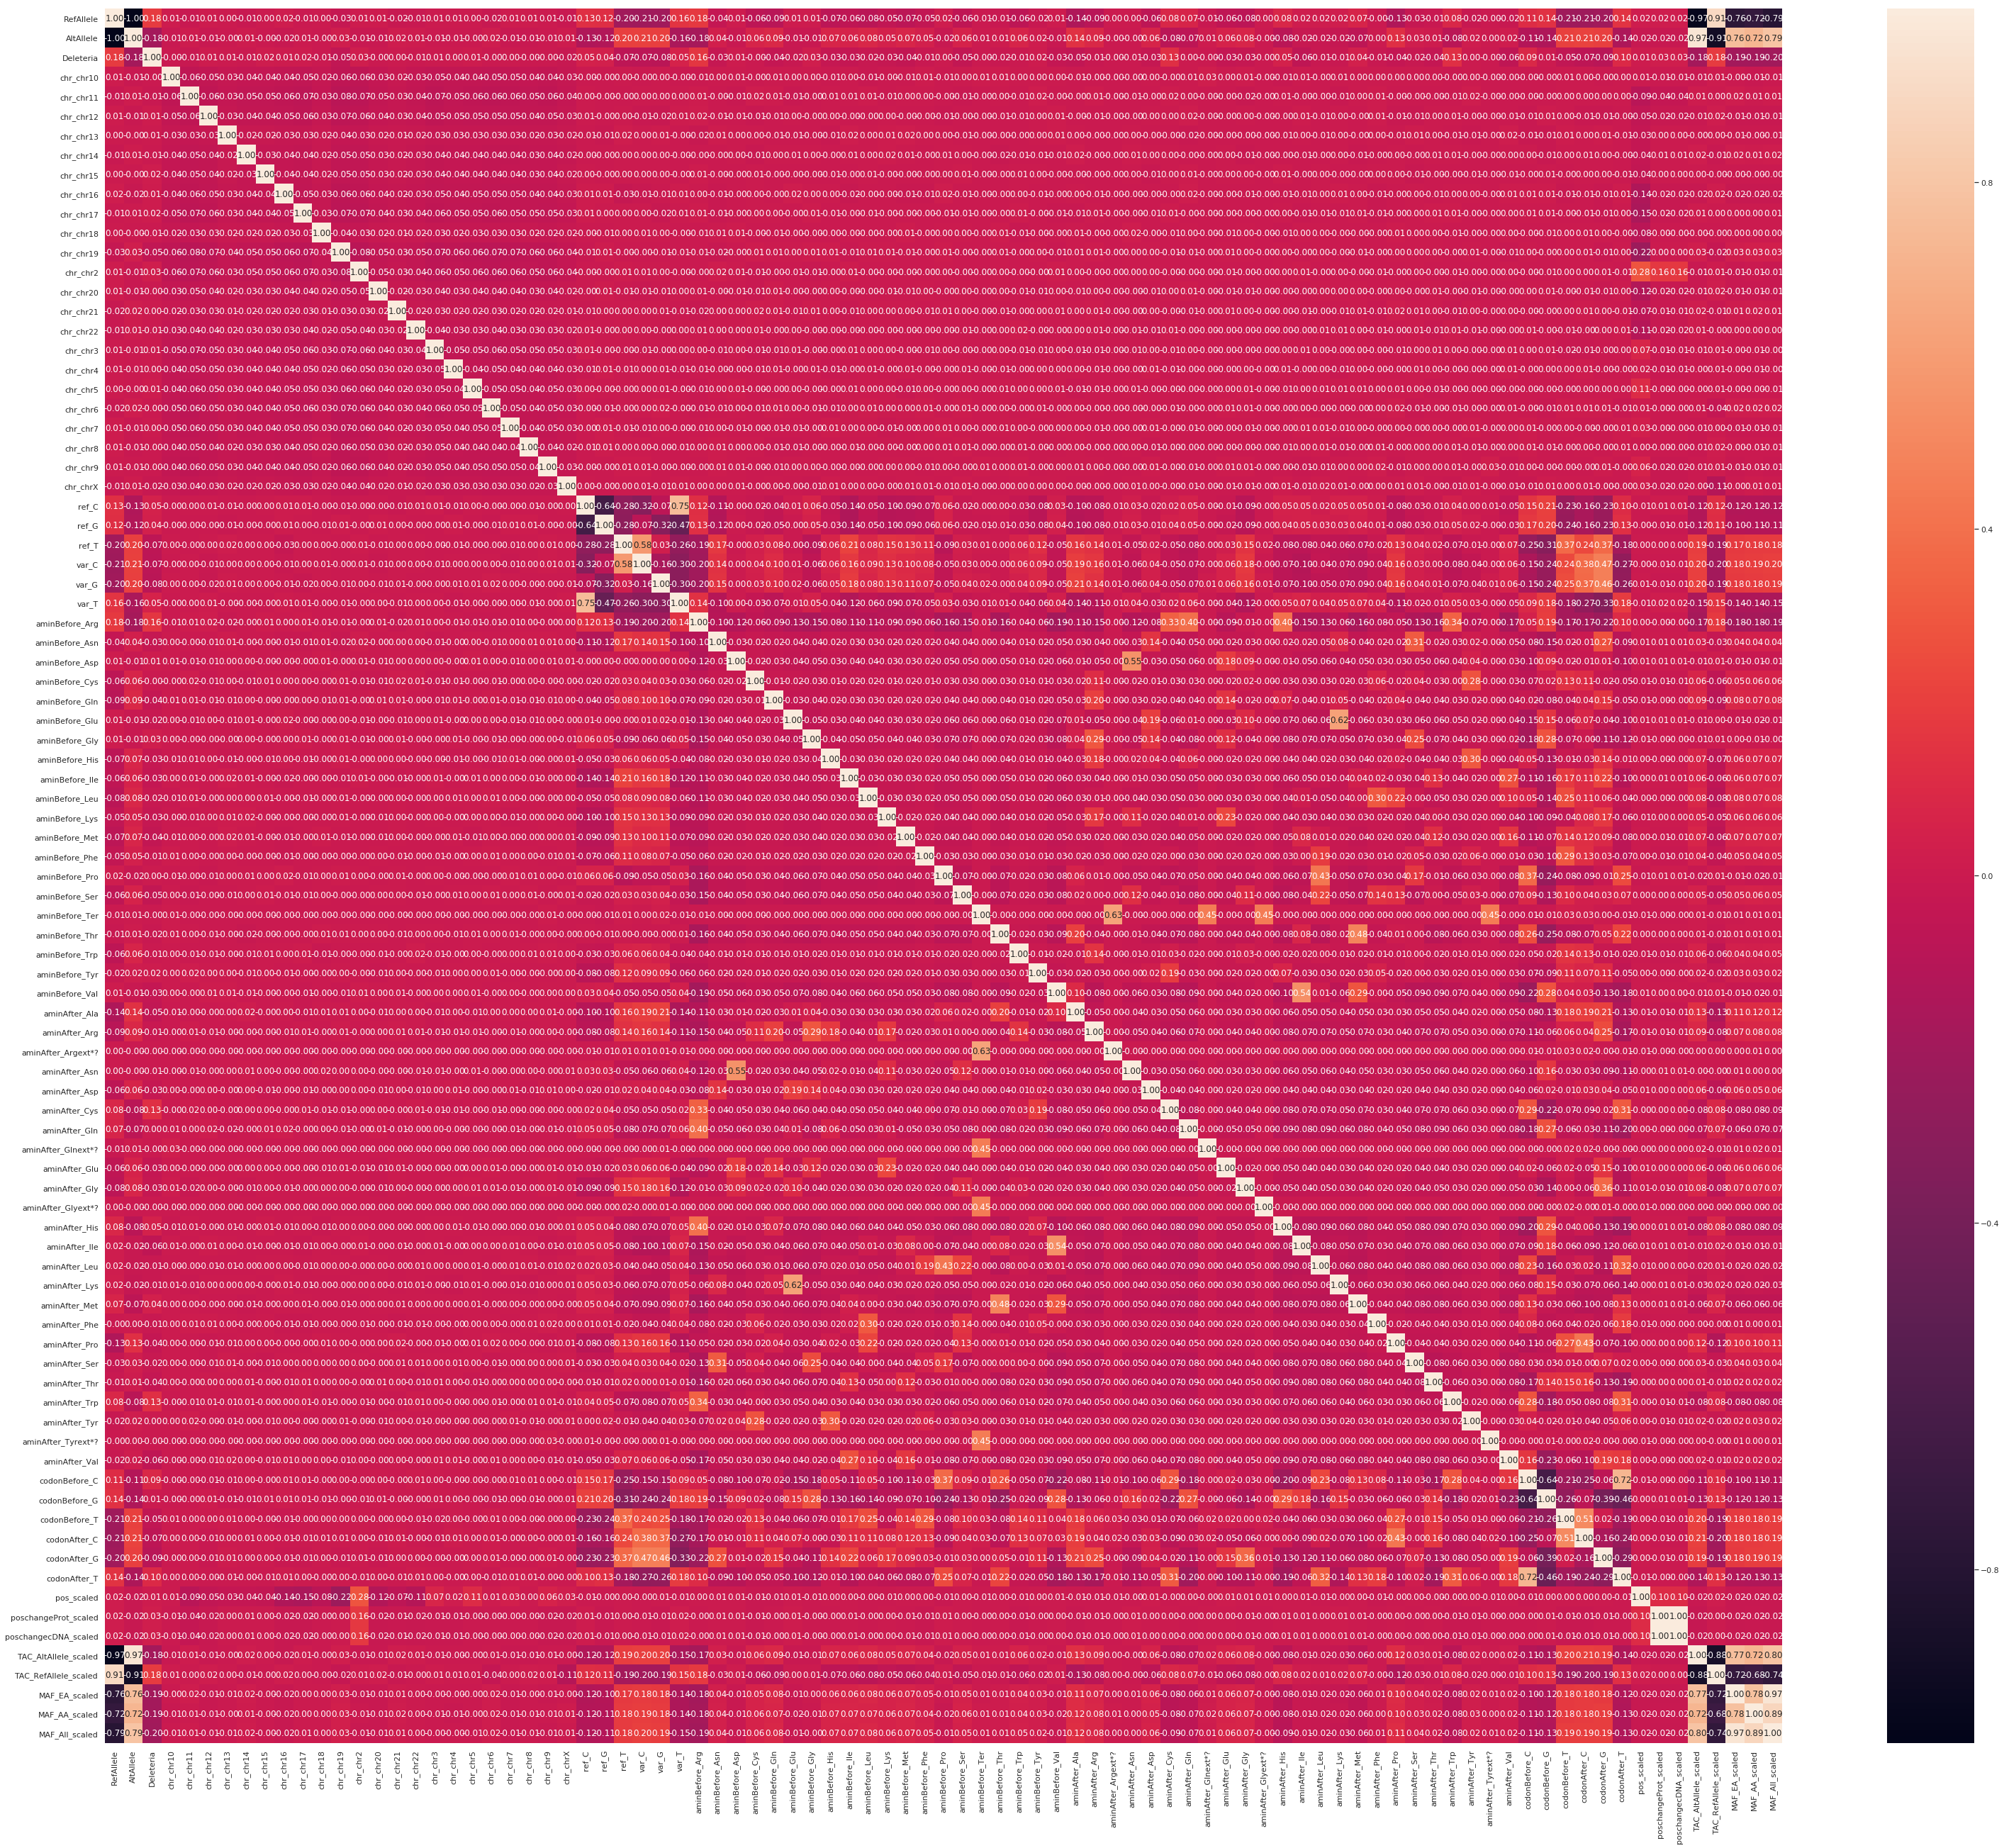

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.figure(figsize=(53, 45))   #(18,10)
sns.heatmap(base_ok.corr(), 
            annot=True, fmt=".2f")

A partir do gráfico acima, podemos ver que há uma alta correlação entre **RefAllele / AltAllele** e **TAC_RefAllele_scaled / TAC_AltAllele_scaled**. Removeremos as colunas **TAC_RefAllele_scaled** e **TAC_AltAllele_scaled**, já que dados de frequência são melhores do que dados de contagem total.

In [0]:
base_ok = base_ok.drop("TAC_AltAllele_scaled",axis=1)
base_ok = base_ok.drop("TAC_RefAllele_scaled",axis=1)

# 3 - Analisando o Balanceamento das Classes na Base 

In [188]:
base_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33859 entries, 0 to 33858
Data columns (total 87 columns):
RefAllele               33859 non-null float64
AltAllele               33859 non-null float64
Deleteria               33859 non-null int64
chr_chr10               33859 non-null int64
chr_chr11               33859 non-null int64
chr_chr12               33859 non-null int64
chr_chr13               33859 non-null int64
chr_chr14               33859 non-null int64
chr_chr15               33859 non-null int64
chr_chr16               33859 non-null int64
chr_chr17               33859 non-null int64
chr_chr18               33859 non-null int64
chr_chr19               33859 non-null int64
chr_chr2                33859 non-null int64
chr_chr20               33859 non-null int64
chr_chr21               33859 non-null int64
chr_chr22               33859 non-null int64
chr_chr3                33859 non-null int64
chr_chr4                33859 non-null int64
chr_chr5                33859 no

In [0]:
import matplotlib.pyplot as plt # to plot graph
import seaborn as sns # for intractve graphs

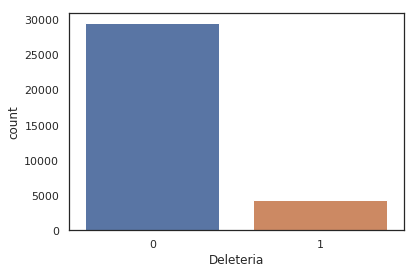

In [234]:
# Now lets check the class distributions
sns.countplot("Deleteria",data=base_ok)

In [235]:
# now let us check in the number of Percentage
Count_Nao_deleteria = len(base_ok[base_ok["Deleteria"]==0]) # mutações não deletérias são representadas por 0
Count_Deleteria = len(base_ok[base_ok["Deleteria"]==1]) # deletérias por 1
Percentage_Nao_deleteria = Count_Nao_deleteria /(Count_Nao_deleteria + Count_Deleteria)
print("Percentagem de Mutações Não Deletérias", Percentage_Nao_deleteria*100)
Percentage_Deleteria = Count_Deleteria/(Count_Nao_deleteria + Count_Deleteria)
print("Percentagem de Mutações Deletérias", Percentage_Deleteria*100)

Percentagem de Mutações Não Deletérias 87.26188015003396
Percentagem de Mutações Deletérias 12.738119849966036


As duas classe estão desbalanceadas, temos que resolver este problema. Na seção três utilizaremos a técnica **Penalize algorithms (cost-sensitive training)** onde será setado o parâmetro do algoritmo de treinamento relacionado com o balanceamento das classes. Na seção quatro utilizaremos a técnica **Down-sample the majority class**, onde será removido, randomicamente, algumas instâncias do dataset de treinamento (onde o valor do atributo **Deleteria** seja igual a 0) para que a proporção entre as duas classes (**0 = Não Deletéria e 1= Deletéria**) seja de 1:1 (o dataset torne-se balanceado)

# 5 - Treinando a Base Desbalanceada Utilizando a Técnica *Down-sample the majority class* 

##5.1 Resolvendo o Problema do Desbalanceamento do Dataset

In [236]:
#Down-sample Majority Class
#Baseado no site https://elitedatascience.com/imbalanced-classes

from sklearn.utils import resample

# Separate majority and minority classes
base_ok_majority = base_ok[base_ok.Deleteria==0]
base_ok_minority = base_ok[base_ok.Deleteria==1]

# Downsample majority class
base_ok_majority_downsampled = resample(base_ok_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=4313,     # to match minority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
base_ok_downsampled = pd.concat([base_ok_majority_downsampled, base_ok_minority])

# Display new class counts
base_ok_downsampled.Deleteria.value_counts()

1    4313
0    4313
Name: Deleteria, dtype: int64

## 5.2 - Dividindo os Dados em Treinamento (train) e Teste (test) e Balanceando o Treinamento

Podemos dividir nosso dataframe (**base_ok**) em dois:

- Uma parte para treinar nosso modelo (80% da base): **train**
- Uma parte para fazer previsões e testar nosso modelo (20% da base): **test**


train_test_split com **stratify=True** resulta em distribuição de classe consistente entre conjuntos de treinamento e teste

In [0]:
from sklearn.model_selection import train_test_split

all_y_balanced = base_ok_downsampled["Deleteria"]
all_X_balanced = base_ok_downsampled.drop(["Deleteria"],axis=1)


train_X_bal, test_X_bal, train_y_bal, test_y_bal = train_test_split(all_X_balanced, all_y_balanced, test_size=0.20, random_state=895, stratify=all_y_balanced)

In [240]:
# show the distribution
print('train class distribution')
print(train_y_bal.value_counts(normalize=True))

print('test class distribution')
print(test_y_bal.value_counts(normalize=True))

train class distribution
1    0.5
0    0.5
Name: Deleteria, dtype: float64
test class distribution
1    0.5
0    0.5
Name: Deleteria, dtype: float64


In [0]:
# keras only suppport tensor, not dataframes
train_data = train_X_bal.astype('float32')
train_label = train_y_bal.astype('float32')
test_data = test_X_bal.astype('float32')
test_label = test_y_bal.astype('float32')

In [197]:
train_data.shape

(6900, 86)

In [198]:
train_label.shape

(6900,)

In [199]:
test_data.shape

(1726, 86)

In [200]:
test_label.shape

(1726,)

## 5.3 -Explorando o GridSearch para Criar Modelos

In [0]:
# Bibliotecas
from keras import models
from keras import layers
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, make_scorer, roc_auc_score, confusion_matrix, classification_report


# Criando diferentes modelos
def create_model(id_model=0,
                 hidden=32,
                 activations="relu",
                 losses="binary_crossentropy"):
    
    model = models.Sequential()
    if id_model == 0:
        model.add(layers.Dense(hidden, activation=activations, input_shape=(train_data.shape[1],)))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 1:
        model.add(layers.Dense(hidden, activation=activations, input_shape=(train_data.shape[1],)))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 2:
        model.add(layers.Dense(hidden, activation=activations, input_shape=(train_data.shape[1],)))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 3:
        model.add(layers.Dense(hidden, activation=activations, input_shape=(train_data.shape[1],)))
        model.add(layers.Dense(hidden//2, activation=activations))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 4:
        model.add(layers.Dense(hidden, activation=activations, input_shape=(train_data.shape[1],)))
        model.add(layers.Dense(hidden//2, activation=activations))
        model.add(layers.Dense(hidden//4, activation=activations))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 5:
        model.add(layers.Dense(hidden, activation=activations, input_shape=(train_data.shape[1],)))
        model.add(layers.Dense(hidden//2, activation=activations))
        model.add(layers.Dense(hidden//4, activation=activations))
        model.add(layers.Dense(hidden//8, activation=activations))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 6:
        model.add(layers.Dense(hidden, activation=activations,input_shape=(train_data.shape[1],)))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 7:
        model.add(layers.Dense(hidden, activation=activations, input_shape=(train_data.shape[1],)))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(hidden//2, activation=activations))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 8:
        model.add(layers.Dense(hidden, activation=activations,input_shape=(train_data.shape[1],)))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(hidden//2, activation=activations))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(hidden//4, activation=activations))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(hidden//8, activation=activations))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 9:
        model.add(layers.Dense(hidden, activation=activations,input_shape=(train_data.shape[1],)))
        model.add(layers.Dropout(0.25))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dropout(0.25))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 10: 
        model.add(layers.Dense(hidden, activation=activations,input_shape=(train_data.shape[1],)))
        model.add(layers.Dropout(0.1))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dropout(0.1))
        model.add(layers.Dense(1, activation='sigmoid'))
    else:
       
        model.add(layers.Dense(hidden, activation=activations,input_shape=(train_data.shape[1],),
                               kernel_initializer="lecun_normal"))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(1, activation='sigmoid'))
    
    # compila o modelo
    model.compile(optimizer='rmsprop',loss=losses,metrics=['accuracy'])
    
    return model

In [222]:

model = KerasClassifier(build_fn=create_model, verbose=0)

# hyperparametros - intervalos de valores
hidden_units = [64]
activations_funct = ['relu']
loss_funct = ['binary_crossentropy']
id_models = [0,1, 2, 3, 4, 5, 6, 7,8, 9, 10]
epochs = [50,100]
batch_size = [100, 200, 300, 400, 500]


# hiperparametros
hyperparameters = dict(id_model=id_models, 
                       hidden=hidden_units, 
                       activations=activations_funct,
                       losses=loss_funct,
                       epochs=epochs,
                       batch_size=batch_size,
                       verbose=[0])

# grid search
grid = GridSearchCV(estimator=model, param_grid=hyperparameters, cv=3, n_jobs = -1)

# Fit grid search
grid_results = grid.fit(train_data,train_label)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [223]:
# summarize resultados
print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))

# validaçao dos resultados
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
time_to_fit = grid_results.cv_results_['mean_fit_time']

for mean, stdev, duration, param in zip(means, stds, time_to_fit,params):
    print("%f (%f) (%f s) with: %r" % (mean, stdev, duration, param))
    

Best: 0.697681 using {'activations': 'relu', 'batch_size': 500, 'epochs': 50, 'hidden': 64, 'id_model': 9, 'losses': 'binary_crossentropy', 'verbose': 0}
0.666812 (0.006568) (6.180988 s) with: {'activations': 'relu', 'batch_size': 100, 'epochs': 50, 'hidden': 64, 'id_model': 0, 'losses': 'binary_crossentropy', 'verbose': 0}
0.664203 (0.004467) (7.142299 s) with: {'activations': 'relu', 'batch_size': 100, 'epochs': 50, 'hidden': 64, 'id_model': 1, 'losses': 'binary_crossentropy', 'verbose': 0}
0.653478 (0.009552) (8.112385 s) with: {'activations': 'relu', 'batch_size': 100, 'epochs': 50, 'hidden': 64, 'id_model': 2, 'losses': 'binary_crossentropy', 'verbose': 0}
0.678841 (0.001955) (6.955103 s) with: {'activations': 'relu', 'batch_size': 100, 'epochs': 50, 'hidden': 64, 'id_model': 3, 'losses': 'binary_crossentropy', 'verbose': 0}
0.661304 (0.006478) (6.044064 s) with: {'activations': 'relu', 'batch_size': 100, 'epochs': 50, 'hidden': 64, 'id_model': 4, 'losses': 'binary_crossentropy', 

In [230]:
#melhor estimador
best_KC = grid.best_estimator_
print(best_KC)
print("_"*40)
#score
print("Score da aprendizagem", np.abs(grid.best_score_))   
print("*"*40)

predictions = best_KC.model.predict_classes(test_data)
accuracy = accuracy_score(test_label, predictions)
print("Acurácia do teste via accuracy_score:", accuracy)


print("*"*40)
#confusion_matrix para uma classificação binária, retorna uma matriz onde:
# na posição 00: quantidade de true negatives
# na posição 01: quantidade de false positives
# na posição 10: quantidade de false negatives
# na posição 11: quantidade de true positives
cm = confusion_matrix(test_label, predictions)
print(pd.DataFrame(cm, columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
print("Acurácia do teste via confusion_matrix:", (cm[0,0]+cm[1,1])/np.sum(cm))
print("*"*40)

________________________________________
Score da aprendizagem 0.6976811540299568
****************************************
Acurácia do teste via accuracy_score: 0.7074159907300116
****************************************
     pred_neg  pred_pos
neg       536       327
pos       178       685
Acurácia do teste via confusion_matrix: 0.7074159907300116
****************************************
